## Group # 4

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Set: https://www.kaggle.com/datasets/impapan/student-performance-data-set

In [3]:
# Load the dataset
data1 = pd.read_csv('student-mat.csv', sep=';')
data2 = pd.read_csv('student-por.csv', sep=';')

In [4]:
# Print first dataset
data1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
# Print column names of first dataset
for col in data1.columns:
    print(col)

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [6]:
# Print second dataset
data2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
# Print second dataset column names
for col in data2.columns:
    print(col)

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [8]:
# Check if both dataset have same column or not
sum(list(data1.columns != data2.columns))

0

In [9]:
# Combine both dataset as both are in same shape and both have all the columns same
data = pd.concat([data1,data2],ignore_index=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [10]:
# Check missing values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
# Find categorical columns
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [12]:
# Encode categorical columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [13]:
# Check statistical details
data.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.260536,0.433908,16.726054,0.727011,0.293103,0.884100,2.603448,2.387931,2.027778,2.246169,...,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,1.244815,0.863522,...,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [14]:
# Check outliers based on absence column
outlier = data['absences'] > 35
data[outlier]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
74,0,0,16,1,0,1,3,3,2,3,...,4,3,3,2,4,5,54,11,12,11
183,0,0,17,1,1,1,3,3,2,2,...,5,3,3,2,3,1,56,9,9,8
276,0,0,18,0,0,0,3,2,2,3,...,4,1,1,1,1,5,75,10,9,9
307,0,1,19,1,0,1,4,4,4,3,...,4,3,4,1,1,4,38,8,9,8
315,0,0,19,0,0,1,2,3,2,2,...,4,1,2,1,1,3,40,13,11,11


In [15]:
# Remove outlier from dataset
data = data.loc[~outlier]

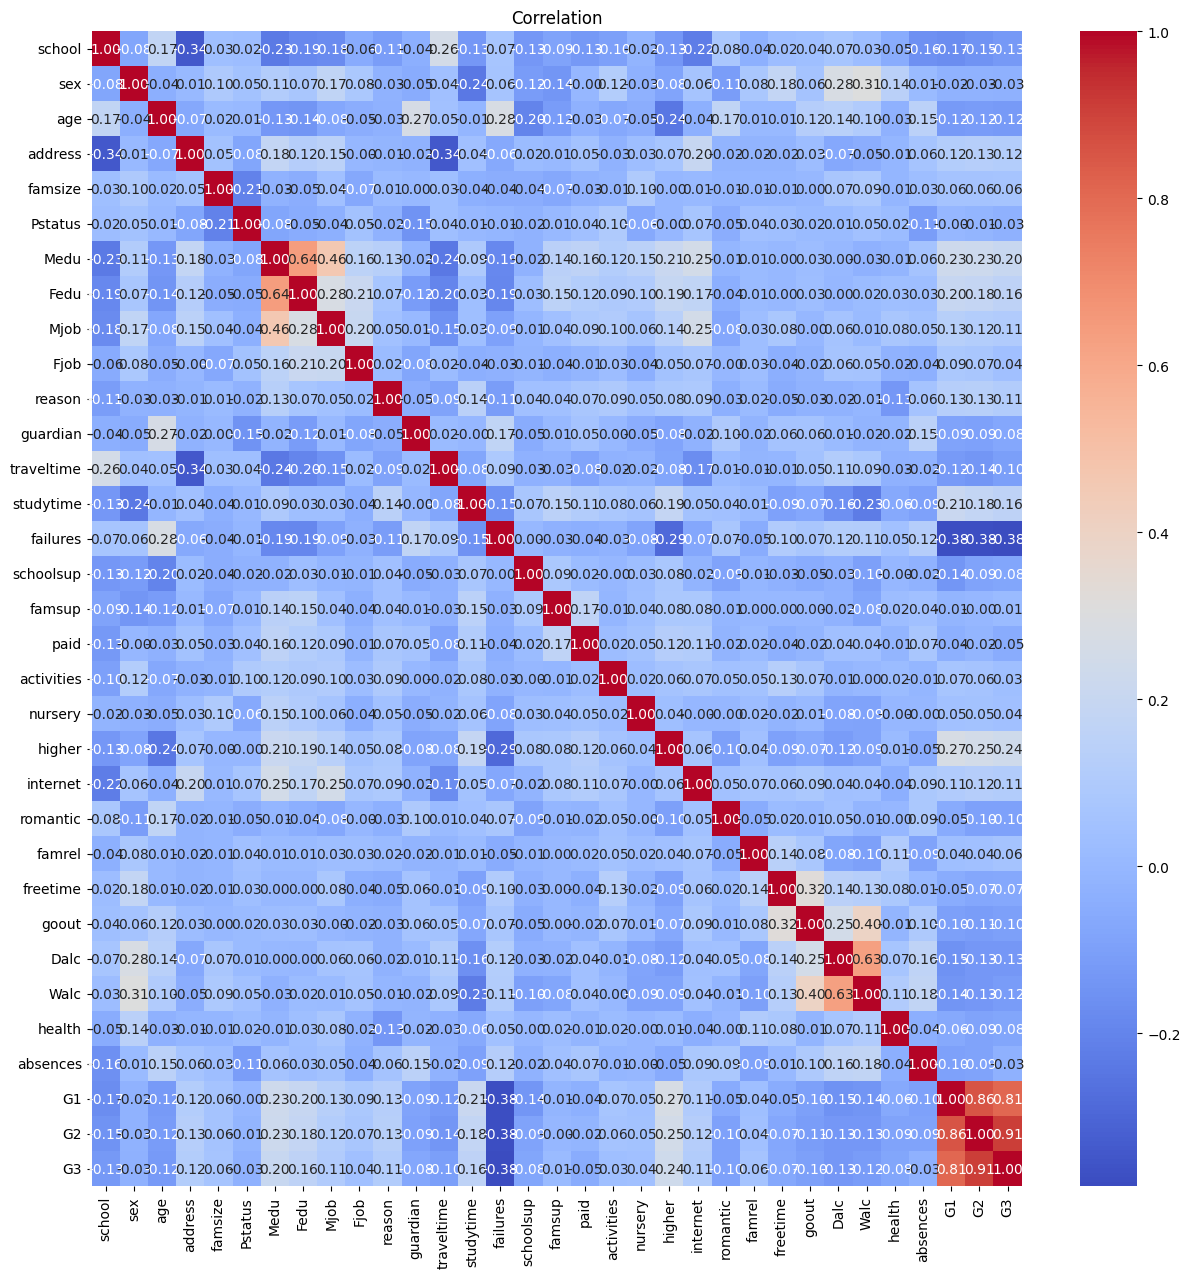

In [16]:
# Check Correlation with heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation")
plt.show()

In [17]:
# Define features and target variable
X = data.drop(columns=['G3'])
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardize the numerical features (for data consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Initialize the models
models = {
    'SVM' : SVR(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boosting' : GradientBoostingRegressor(),
    'Neural Network' : MLPRegressor(hidden_layer_sizes=(15,),activation='relu',max_iter=1000),
    'Decision Tree' : DecisionTreeRegressor(),
    'Linear Regression' : LinearRegression()
}

In [20]:
# Fit models and make predictions
model_predictions = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_predictions[model_name] = predictions

In [21]:
# Fetch the predictions of each model
svm_preds = model_predictions['SVM']
rf_preds = model_predictions['Random Forest']
gbm_preds = model_predictions['Gradient Boosting']
nn_preds = model_predictions['Neural Network']
dt_preds = model_predictions['Decision Tree']
lr_preds = model_predictions['Linear Regression']

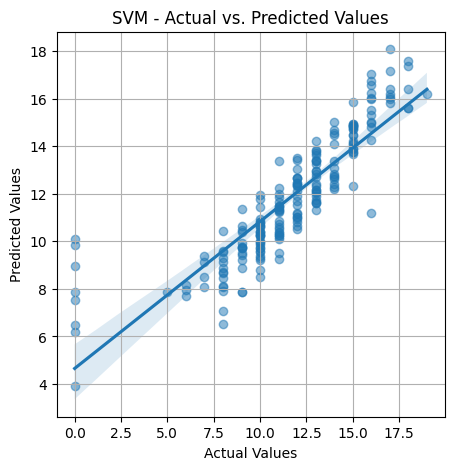

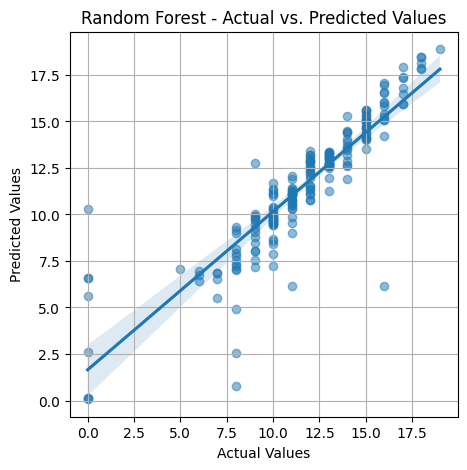

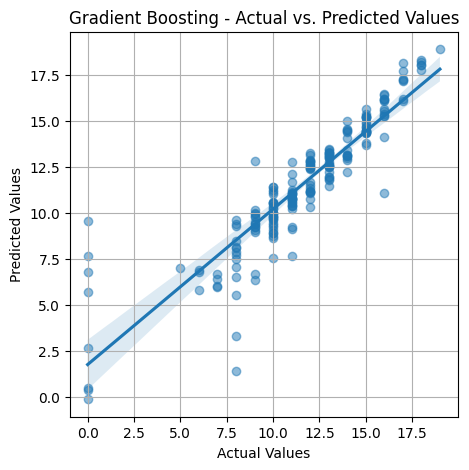

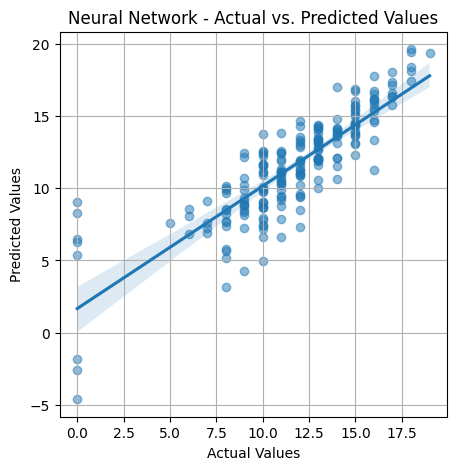

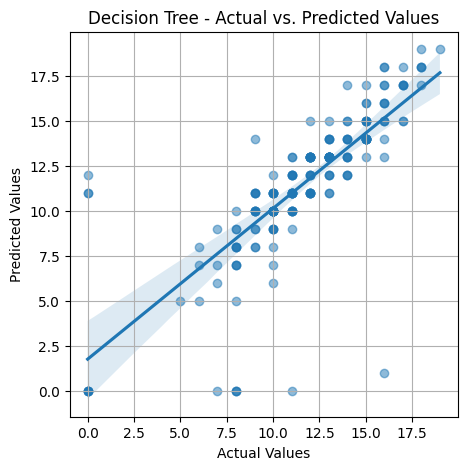

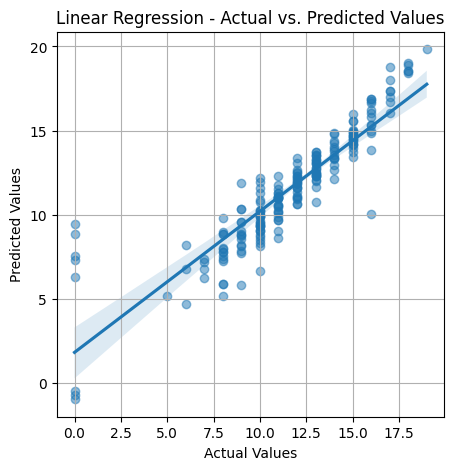

In [22]:
# Scatter plots of actual vs. predicted values for each model
for model_name, predictions in model_predictions.items():
    plt.figure(figsize=(5, 5))
    sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha': 0.5})
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs. Predicted Values')
    plt.grid(True)
    plt.show()

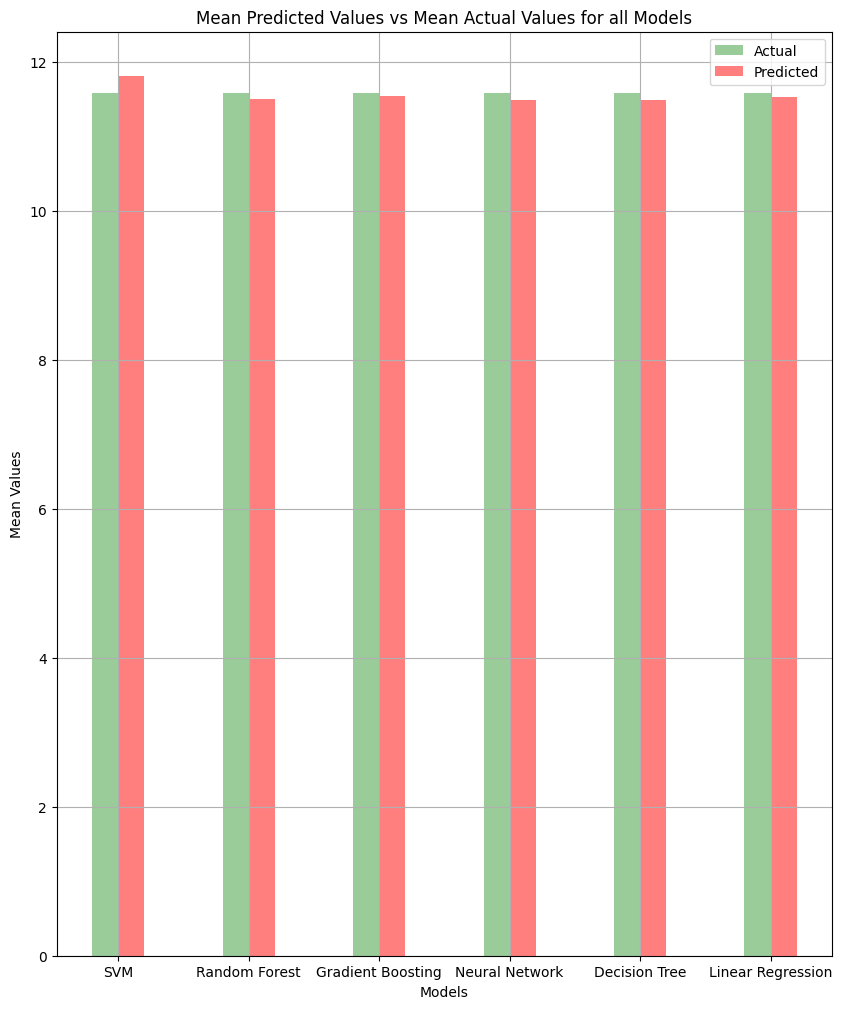

In [23]:
# Calculate mean predicted values and mean actual values for each model
models = ['SVM', 'Random Forest', 'Gradient Boosting', 'Neural Network', 'Decision Tree', 'Linear Regression']
mean_predicted_values = [svm_preds.mean(), rf_preds.mean(), gbm_preds.mean(), nn_preds.mean(), dt_preds.mean(), lr_preds.mean()]
mean_actual_values = y_test.mean()

# Grouped bar chart with mean predicted and actual values
fig, ax = plt.subplots(figsize=(10, 12))
width = 0.20

ax.bar(np.arange(len(models)), mean_actual_values, width, label='Actual', color='green', alpha=0.4)
ax.bar(np.arange(len(models)) + width, mean_predicted_values, width, label='Predicted', color='r', alpha=0.5)

ax.set_xlabel('Models')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Predicted Values vs Mean Actual Values for all Models')
ax.set_xticks(np.arange(len(models)) + width / 2)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True)
plt.show()

In [24]:
# Calculate evaluation metrics for each model
for model_name, predictions in model_predictions.items():
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    # Print evaluation metrics for each model
    print(f"{model_name} Model: \nMAE = {mae:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}, R-squared = {r2:.4f} \n")

SVM Model: 
MAE = 1.1377, MSE = 3.5414, RMSE = 1.8819, R-squared = 0.7330 

Random Forest Model: 
MAE = 0.8990, MSE = 2.7975, RMSE = 1.6726, R-squared = 0.7891 

Gradient Boosting Model: 
MAE = 0.8743, MSE = 2.3269, RMSE = 1.5254, R-squared = 0.8245 

Neural Network Model: 
MAE = 1.4258, MSE = 4.0506, RMSE = 2.0126, R-squared = 0.6946 

Decision Tree Model: 
MAE = 1.2260, MSE = 6.0048, RMSE = 2.4505, R-squared = 0.5472 

Linear Regression Model: 
MAE = 0.9314, MSE = 2.6008, RMSE = 1.6127, R-squared = 0.8039 



##### MAE, RMSE: A lower MAE and RMSE indicates that the model's prediction are closer to actual values.
##### R-squared: R-squared measures the proportion of the variance in the dependent variable that's predictable from the independent variables. A higher R-squared indicates that the model explains more variance

## Based on MAE, RMSE and R-squared value Gradient Boosting Model is better for predicting the grade.

Code Reference:<br>
https://www.datatechnotes.com/2019/01/svr-example-in-python.html<br>
https://www.datatechnotes.com/2020/09/regression-example-with-randomforestregressor.html<br>
https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/<br>
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression<br>
https://python-course.eu/machine-learning/neural-networks-with-scikit.php<br>
https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
